<center> 
<h2><b> Adnan Rashid </b></h2>
    <nav>
        <h3>
    | <a href="00-Contents-Setup.ipynb"> Home Page </a> | 
        <a href="http://bit.ly/cka_notes_original"> Kubernetes Notes </a> |
        <a href="https://adnan.study"> Website </a> |
        <a href="https://www.instagram.com/adnans_techie_studies/"> Instagram </a> |
        <a href="https://www.linkedin.com/in/adnanrashid1/"> LinkedIn </a> |
        </h3>
    </nav>
</center>

<h1 style="background:black"><code style="background:black;color:white"><center>Helm v3</center></code></h1>

<div class="alert alert-block alert-warning">
<font style="color:black">
<center> In this version the Tiller component has been removed and it simplifies operations and security. <br><br>HELM is a package manager for Kubernetes that packages multiple kubernetes resources into a single logical deployment unit called a <b> Chart </b>.<br><br> Charts are easy to create, version, share and publish. 
    </center></font></div>

<center><img src="https://adnanstudyimages.s3-eu-west-1.amazonaws.com/11.jpg" width="50%" height="50%" border=5/><br><br>
    

<blockquote>

In this section we will: 
    
* Achieve a simple (one command) and repeatable deployment
* Manage application dependency, using specific versions of other application and services
* Manage multiple deployment configurations: test, staging, production and others
* Execute post/pre deployment jobs during application deployment
* Update/rollback and test application deployments


* What is Helm? 

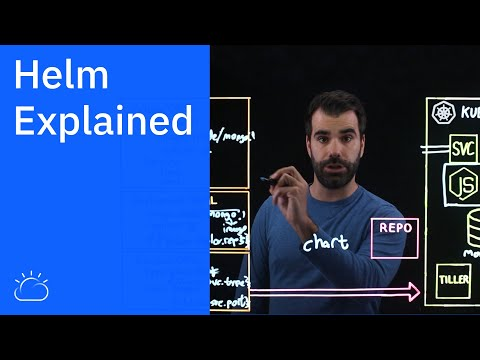

In [96]:
from IPython.display import YouTubeVideo
YouTubeVideo('fy8SHvNZGeE')

## Pre-requisite

* Check your variables are loaded

In [ ]:
%store

* Load in variable store

In [ ]:
%store -r 

* Load variables into notebook

In [ ]:
%env AWS_PROFILE=$AWS_PROFILE
%env AWS_DEFAULT_REGION=$AWS_DEFAULT_REGION
%env ACCOUNT_ID=$ACCOUNT_ID

* Check identity 

In [ ]:
!aws sts get-caller-identity

<br>

---
---

<br>

#### Install Helm CLI 

* We need to first install the command line tools that you will interact with. 

In [ ]:
!curl -sSL https://raw.githubusercontent.com/helm/helm/master/scripts/get-helm-3 | bash

* Verify the version

In [ ]:
!helm version --short

Let's configure our first Chart repository. Chart repositories are similar to APT or yum repositories that you might be familiar with on Linux, or Homebrew on MacOS

* Add the 'stable' repository so we have something to start with

In [ ]:
!helm repo add stable https://kubernetes-charts.storage.googleapis.com/

* Once installed, we will be able to list the charts you can install 

In [ ]:
!helm search repo stable

<h1 style="background:black"><code style="background:black;color:white"><center>Deploy NGINX with Helm</center></code></h1>

<div class="alert alert-block alert-warning">
<font style="color:black">
<center> In this section we will dig deeper with Helm and demonstrate how to install the nginx web server
    </center>
    </font>
    </div>

<center><img src="https://adnanstudyimages.s3-eu-west-1.amazonaws.com/10.jpg" width="50%" height="50%" border=5/>






* [Update the Chart Repository](#update)
* [Search Chart Repositories](#search)
* [Add the Bitnami Repository](#repo)
* [Install Bitnami/Nginx](#install)
* [Clean Up](#nginxcleanup)

## <br><br>Update the Chart Repository <a class="anchor" id="update"></a>

Helm uses a packaging format called 'Charts'. Chart is a collection of files and templates that describes kubernetes resources.

Charts can be simple, describing something like a standalone web server or more complex.

Instead of installing Kubernetes resources manually via kubectl, one can use Helm to install pre-defined Charts faster, with less chance of typos or other errors.

Chart repositories change frequently due to updates and new additions 

* To keep Helm's local list updated, we need to occasionally run repository update

In [ ]:
!helm repo add stable https://kubernetes-charts.storage.googleapis.com/
!helm repo update

## <br><br>Search Chart Repositories <a class="anchor" id="search"></a>

* To list all charts 

In [ ]:
!helm search repo 

* We can now search for charts with keyword argument 

In [ ]:
!helm search repo nginx

## <br><br>Add the Bitnami Repository<a class="anchor" id="repo"></a>

* There is a chart for the nginx standalone web server available via Bitnami Chart Repository

In [ ]:
!helm repo add bitnami https://charts.bitnami.com/bitnami

* We can show search all Bitnami charts

In [ ]:
!helm search repo bitnami/nginx

## <br><br>Install Bitnami / NGINX<a class="anchor" id="install"></a>

Installing the Bitnami standalone nginx web server Chart involves using the <b> helm install </b> command. 

A Helm chart can be installed multiple times inside a kubernetes cluster. This is because each installation of a Chart can be customised to suit a different purpose. 

For this reason, you must supply a unique name for the installation or ask Helm to generate a name for you

* Install bitnami/nginx with the name mywebserver for the kubernetes deployment 

In [ ]:
!helm install mywebserver bitnami/nginx 

* View Services, pods and Deployments

In [ ]:
!kubectl get svc,po,deploy

* Inspect the deployment in more detail

In [ ]:
!kubectl describe deployment mywebserver

* Verify the pods was successfully deployed

In [ ]:
!kubectl get pods -l app.kubernetes.io/name=nginx

* Service URL 

In [ ]:
!kubectl get service mywebserver-nginx -o wide

* Check the external Service connectivity 

This can take a few moments to become available, you can check the progress in the AWS Console also

In [ ]:
!curl a08a24987404646228c51f8bbf89fd0e-391589784.eu-west-1.elb.amazonaws.com

## <br><br> Clean Up<a class="anchor" id="nginxcleanup"></a>

* Before we uninstall our application, we can verify what we have running via Helm 

In [ ]:
!helm list 

* Uninstall 

In [ ]:
!helm uninstall mywebserver

* Verify our pods and service are no longer availble 

Look at Lens IDE to see status also

In [ ]:
!kubectl get pods -l app.kubernetes.io/name=nginx
!kubectl get service mywebserver-nginx -o wide

<br><br>
<center>
<h1 style="background:black">
<code style="background:black;color:white">
Deploy Example Microservices Using Helm
</code>

<div class="alert alert-block alert-warning">
<font style="color:black">
<center> In this section we will demonstrate how to deploy microservices using a custom Helm Chart, instead of doing everything manually using <b> kubectl </b>
</center>
    </font>
    </div>

<center><img src="https://adnanstudyimages.s3-eu-west-1.amazonaws.com/12.jpg" width="50%" height="50%" border=5/>


In the eksdemo directory you have the following files 
<blockquote>
<b>deployment.yaml:</b> A basic manifest for creating a Kubernetes deployment<br><br>
<b>_helpers.tpl:</b> A place to put template helpers that you can re-use throughout the chart<br><br>
<b>ingress.yaml:</b> A basic manifest for creating a Kubernetes ingress object for your service<br><br>
<b>NOTES.txt: The</b> “help text” for your chart. This will be displayed to your users when they run helm install.<br><br>
<b>serviceaccount.yaml:</b> A basic manifest for creating service account.<br><br>
<b>service.yaml:</b> A basic manifest for creating a service endpoint for your deployment<br><br>
<b>tests/:</b> A folder which contains tests for chart
</blockquote><br>
We will create our own files and delete the boilerplate files<br><br>

* You can create a new chart with the following command, however it is not necessary to run the following as a folder has already been created 

* Check the Chart.yaml file which will describe the chart 

In [ ]:
!cat eksdemo/Chart.yaml

* In deployment and service folder, the files from the ecsdemo-frontend, ecsdemo-nodejs and ecsdemo-crystal have been copied across and renamed  

In [ ]:
!ls eksdemo/templates/deployment 

In [ ]:
!ls eksdemo/templates/service

All files in the templates directory are sent through the template engine. These are currently plain YAML files that would be sent to Kubernetes as-is. 

* In eksdemo/templates/deployment/frontend.yaml, crystal.yaml and nodejs.yaml, we are using <b> template directives </b> to enable more customisation by removing hard-coded values 

* Under spec.template.spec.containers.image, also replaced hardcoded image with template value

* The following file provides our <b> template directives </b> with default values

In [ ]:
!cat eksdemo/values.yaml 

* As we are running a jupyter notebook we need to ignore the checkpoints in the <b>.helmignore</b> file 

## <br><br>Deploy the EKSDemo Chart

The following will build and output the rendered templates without installing the Chart 

* To test the syntax and validity of the Chart without actually deploying it, we'll use the --dry-run flag 

In [ ]:
!helm install --debug --dry-run workshop eksdemo

Confirm that the values created by the template look correct 

* Deploy/install the chart 

In [ ]:
!helm install workshop eksdemo

* Review the underlying services, pods and deployments 

In [ ]:
!kubectl get svc,po,deploy

## <br><br>Test the Service

* To test the service our eksdemo Chart created, we'll need to get the name of the ELB endpoint that was generated when we deployed the Chart

This will take a few minutes to deploy

In [ ]:
!kubectl get svc ecsdemo-frontend -o jsonpath="{.status.loadBalancer.ingress[*].hostname}"; echo

* Copy the above and paste into browser

Refreshing the page will show that it is going to a different node each time

## <br><br>Rolling Back 

Mistakes will happen during deployment, and when they do, Helm makes it easy to undo or 'roll back' to the previously deployed version. 

Lets update the demo application chart with a breaking change 

* In <b>eksdemo/values.yaml</b>, edit the docker image for the frontend to something that does not exist i.e. <b>brentley/ecsdemo-nodejs-non-existing </b>

* Deploy the updated chart 

In [ ]:
!helm upgrade workshop eksdemo 

<br><Br>The rolling upgrade will begin by creating a new nodejs pod with the new image. 

The new <b> ecsdemo-nodejs</b> pod should fail to pull non-existing image. 

* Lets see whats happened 

In [ ]:
!kubectl get pods 

* Verify the last deployed timestamp 

In [ ]:
!helm status workshop 

* The above value should correspond to the last entry on the history 

In [ ]:
!helm history workshop

## <br><br>Rollback the failed upgrade 

* List Helm release versions 

In [ ]:
!helm history workshop

* Rollback the application to the previous working release revision

In [ ]:
!helm rollback workshop 1

* Validate workshop release status

In [ ]:
!helm status workshop 

* Validate the error is gone 

In [ ]:
!kubectl get pods 

## <br><br>Clean up 

* Delete the workshop release 

In [ ]:
!helm uninstall workshop